In [1]:
import sys #libreria del sistema operativo
import os #libreria manejo de carpetas
import os.path as path
import tensorflow as tf #libreria para desarrollar modelos
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten,Dense, Activation
from tensorflow.keras.layers import Convolution2D,MaxPooling2D
training_folder = r"H:\.shortcut-targets-by-id\112S4pQsnl_dTUfZ36HD4GhvPg3CK-QMh\CLASIFICADOR\train" #Carpeta de datos de entrenamiento
test_folder =r"H:\.shortcut-targets-by-id\112S4pQsnl_dTUfZ36HD4GhvPg3CK-QMh\CLASIFICADOR\validacion" #Carpeta de datos de validacion

#Parametros

epocas=10 #numero epocas de entrenamiento
longitud, altura = 50, 50 #dimensiones de las imagenes
batch_size = 10 #establece la magnitud del lote de imagenes



In [3]:
pasos = 100 #establece el numero de muestras por epoca
test_steps = 50 #establece el numero de muestras de validaciones de cada epoca
filtrosConv1 = 32 #profundidad del primer kernel
filtrosConv2 = 64 #profundidad del segundo kernel
tamano_filtro1 = (3, 3) #largo y alto del primer kernel
tamano_filtro2 = (2, 2) #largo y alto del segundo kernel
tamano_pool = (2, 2) #largo y alto del Maxpooling
clases = 7 #longitud del vector de salida
#Preprocesamiento de imagenes
ima_gen_training = ImageDataGenerator(rescale=1. / 255, #Los valores se transforman de 0 a 1
                                      shear_range=0.2, #Algunas imagenes se transforman con un cizallamiento
                                      zoom_range=0.2, #Algunas imagenes se amplian
                                      horizontal_flip=True) #Algunas imagenes se invierten demanera horizontal

ima_gen_test = ImageDataGenerator(rescale=1. / 255) #para los datos de validacion solo es necesario cambiar el formato delas imagenes

training_data =ima_gen_training.flow_from_directory(training_folder,target_size=(altura, longitud),batch_size=batch_size,class_mode="categorical")

test_data = ima_gen_test.flow_from_directory(test_folder,
                                             target_size=(altura, longitud),
                                             batch_size=batch_size,class_mode="categorical")
model = Sequential()
model.add(Convolution2D(filtrosConv1, tamano_filtro1, padding ="same", input_shape=(longitud, altura, 3), activation="relu")) #capa_1: primera convolucion
model.add(MaxPooling2D(pool_size=tamano_pool))#capa_2: primer Maxpooling
model.add(Convolution2D(filtrosConv2, tamano_filtro2, padding ="same", activation="relu")) #capa_3: segunda convolucion
model.add(MaxPooling2D(pool_size=tamano_pool)) #capa_4:segundo Maxpooling
model.add(Flatten())#capa_5: Transfomacion a vector
model.add(Dense(256, activation="relu")) #capa_6: capa densa
model.add(Dense(clases, activation="softmax")) #capa_7: salida de la red
opt= tf.optimizers.Adam()
model.compile(optimizer=opt, loss="categorical_crossentropy",metrics=['accuracy'])


Found 22560 images belonging to 7 classes.
Found 1804 images belonging to 7 classes.


In [4]:
checkpoint_prefix=os.path.join(r"H:\Mi unidad\Raster\checkpoint/","ckpt") 
checkpoint=tf.train.Checkpoint(model=model,opt=opt)
# checkpoint.restore(tf.train.latest_checkpoint(r"D:\haar\checkpoint/")).expect_partial() ##### restaurar el ultimo entrenamiento

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [6]:
history=model.fit(training_data,epochs=epocas,validation_data=test_data)


Epoch 1/10
  39/2256 [..............................] - ETA: 4:00:41 - loss: 0.2673 - accuracy: 0.9410


KeyboardInterrupt



In [6]:
checkpoint.save(file_prefix=checkpoint_prefix) #guardar entrenamiento

'D:\\haar\\checkpoint/ckpt-1'

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


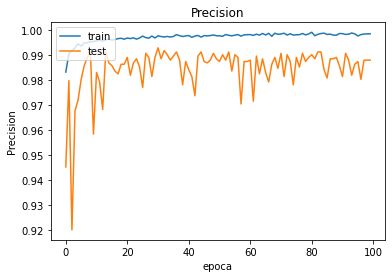

In [7]:
import matplotlib.pyplot as plt
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precision')
plt.ylabel('Precision')
plt.xlabel('epoca')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

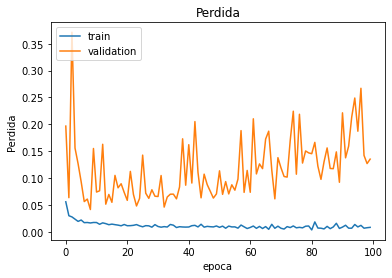

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdida')
plt.ylabel('Perdida')
plt.xlabel('epoca')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [9]:
target_dir = "./modelo/"
if not os.path.exists(target_dir):
    os.mkdir(target_dir)
model.save(target_dir+"modelo.h5")

In [10]:
import numpy as np
# from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import load_img,img_to_array
from keras.models import load_model
target_dir = "./modelo/"
longitud, altura = 50,50
modelo = target_dir+"modelo.h5"
# pesos_modelo = './modelo/pesos.h5'
cnn = load_model(modelo)
# cnn.load_weights(pesos_modelo)
import glob
def predict(dataset):
    answer=[]
    dataset=glob.glob(dataset+"*.png")
    for file in dataset:
        x = load_img(file, target_size=(longitud, altura))
        x = img_to_array(x)
        x = np.expand_dims(x, axis=0)
        array = cnn.predict(x)
        result = array[0]
        print(result[0]*100)
        answer.append(np.argmax(result))
    return answer
#         if answer == 0:
#             print("pred: casa")
#         elif answer == 1:
#             print("pred: terreno")
#         return ans

In [15]:
s=predict("D:/haar/classes/validacion/casas/")

1/1 [==============================] - 0s 19ms/step
0.0
1/1 [==============================] - 0s 21ms/step
0.0
1/1 [==============================] - 0s 17ms/step
0.0
1/1 [==============================] - 0s 20ms/step
0.0
1/1 [==============================] - 0s 20ms/step
0.0
1/1 [==============================] - 0s 20ms/step
0.0
1/1 [==============================] - 0s 18ms/step
0.0
1/1 [==============================] - 0s 18ms/step
0.0
1/1 [==============================] - 0s 20ms/step
0.0
1/1 [==============================] - 0s 25ms/step
0.0
1/1 [==============================] - 0s 21ms/step
0.0
1/1 [==============================] - 0s 21ms/step
0.0
1/1 [==============================] - 0s 18ms/step
0.0
1/1 [==============================] - 0s 18ms/step
0.0
1/1 [==============================] - 0s 21ms/step
0.0
1/1 [==============================] - 0s 21ms/step
0.0
1/1 [==============================] - 0s 19ms/step
0.0
1/1 [==============================] - 0s 18ms/s

1/1 [==============================] - 0s 20ms/step
0.0
1/1 [==============================] - 0s 21ms/step
0.0
1/1 [==============================] - 0s 21ms/step
0.0
1/1 [==============================] - 0s 16ms/step
0.0
1/1 [==============================] - 0s 20ms/step
0.0
1/1 [==============================] - 0s 18ms/step
0.0
1/1 [==============================] - 0s 18ms/step
0.0
1/1 [==============================] - 0s 19ms/step
0.0
1/1 [==============================] - 0s 19ms/step
0.0
1/1 [==============================] - 0s 18ms/step
0.0
1/1 [==============================] - 0s 18ms/step
0.0
1/1 [==============================] - 0s 20ms/step
0.0
1/1 [==============================] - 0s 20ms/step
0.0
1/1 [==============================] - 0s 19ms/step
0.0
1/1 [==============================] - 0s 19ms/step
0.0
1/1 [==============================] - 0s 18ms/step
0.0
1/1 [==============================] - 0s 17ms/step
0.0
1/1 [==============================] - 0s 20ms/s

1/1 [==============================] - 0s 18ms/step
0.0
1/1 [==============================] - 0s 17ms/step
0.0
1/1 [==============================] - 0s 21ms/step
0.0
1/1 [==============================] - 0s 18ms/step
0.0
1/1 [==============================] - 0s 21ms/step
0.0
1/1 [==============================] - 0s 17ms/step
0.0
1/1 [==============================] - 0s 19ms/step
0.0
1/1 [==============================] - 0s 17ms/step
0.0
1/1 [==============================] - 0s 20ms/step
0.0
1/1 [==============================] - 0s 14ms/step
0.0
1/1 [==============================] - 0s 16ms/step
0.0
1/1 [==============================] - 0s 18ms/step
0.0
1/1 [==============================] - 0s 17ms/step
0.0
1/1 [==============================] - 0s 20ms/step
0.0
1/1 [==============================] - 0s 16ms/step
0.0
1/1 [==============================] - 0s 17ms/step
0.0
1/1 [==============================] - 0s 17ms/step
0.0
1/1 [==============================] - 0s 22ms/s

1/1 [==============================] - 0s 19ms/step
0.0
1/1 [==============================] - 0s 19ms/step
0.0
1/1 [==============================] - 0s 17ms/step
0.0
1/1 [==============================] - 0s 18ms/step
0.0
1/1 [==============================] - 0s 15ms/step
0.0
1/1 [==============================] - 0s 17ms/step
0.0
1/1 [==============================] - 0s 19ms/step
0.0
1/1 [==============================] - 0s 17ms/step
0.0
1/1 [==============================] - 0s 18ms/step
0.0
1/1 [==============================] - 0s 16ms/step
0.0
1/1 [==============================] - 0s 17ms/step
0.0
1/1 [==============================] - 0s 18ms/step
0.0
1/1 [==============================] - 0s 18ms/step
0.0
1/1 [==============================] - 0s 18ms/step
0.0
1/1 [==============================] - 0s 20ms/step
0.0
1/1 [==============================] - 0s 16ms/step
0.0
1/1 [==============================] - 0s 18ms/step
0.0
1/1 [==============================] - 0s 16ms/s

1/1 [==============================] - 0s 19ms/step
0.0
1/1 [==============================] - 0s 19ms/step
0.0
1/1 [==============================] - 0s 19ms/step
0.0
1/1 [==============================] - 0s 20ms/step
0.0
1/1 [==============================] - 0s 19ms/step
0.0
1/1 [==============================] - 0s 21ms/step
0.0
1/1 [==============================] - 0s 18ms/step
0.0
1/1 [==============================] - 0s 19ms/step
0.0
1/1 [==============================] - 0s 18ms/step
0.0
1/1 [==============================] - 0s 19ms/step
0.0
1/1 [==============================] - 0s 17ms/step
0.0
1/1 [==============================] - 0s 17ms/step
0.0
1/1 [==============================] - 0s 18ms/step
0.0
1/1 [==============================] - 0s 19ms/step
0.0
1/1 [==============================] - 0s 19ms/step
0.0
1/1 [==============================] - 0s 17ms/step
0.0
1/1 [==============================] - 0s 16ms/step
0.0
1/1 [==============================] - 0s 18ms/s

In [16]:
dataset="D:/haar/classes/validacion/casas/"
dataset=glob.glob(dataset+"*.png")

In [17]:
pd.DataFrame({"s":s,"sa":dataset})

,s,sa
0,2,D:/haar/classes/validacion/casas\0_0.png
1,2,D:/haar/classes/validacion/casas\0_1.png
2,2,D:/haar/classes/validacion/casas\0_10.png
3,2,D:/haar/classes/validacion/casas\0_11.png
4,2,D:/haar/classes/validacion/casas\0_12.png
...,...,...
1284,2,D:/haar/classes/validacion/casas\9_5.png
1285,2,D:/haar/classes/validacion/casas\9_6.png
1286,2,D:/haar/classes/validacion/casas\9_7.png
1287,2,D:/haar/classes/validacion/casas\9_8.png
